In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [2]:
# Load Dataset 
df = pd.read_csv("online_exam_cheating_detection.csv")
df.head()

,tab_switch_count,webcam_disconnects,time_per_question,copy_paste_actions,face_not_detected_count,suspicious_keypress_count,cheating
0,6,5,51.32,0,9,8,1
1,19,3,84.88,9,2,13,1
2,14,5,51.29,2,9,9,1
3,10,3,99.84,0,8,8,1
4,7,1,80.05,11,2,6,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tab_switch_count           2000 non-null   int64  
 1   webcam_disconnects         2000 non-null   int64  
 2   time_per_question          2000 non-null   float64
 3   copy_paste_actions         2000 non-null   int64  
 4   face_not_detected_count    2000 non-null   int64  
 5   suspicious_keypress_count  2000 non-null   int64  
 6   cheating                   2000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 109.5 KB


In [4]:
df.describe()

,tab_switch_count,webcam_disconnects,time_per_question,copy_paste_actions,face_not_detected_count,suspicious_keypress_count,cheating
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,9.266500,2.545500,82.299145,5.495000,4.493000,7.21400,0.995500
std,5.810108,1.698344,38.735454,3.445274,2.960293,4.26794,0.066948
min,0.000000,0.000000,15.030000,0.000000,0.000000,0.00000,0.000000
25%,4.000000,1.000000,48.687500,2.000000,2.000000,4.00000,1.000000
50%,9.000000,3.000000,82.910000,5.000000,5.000000,7.00000,1.000000
75%,14.000000,4.000000,115.985000,9.000000,7.000000,11.00000,1.000000
max,19.000000,5.000000,149.680000,11.000000,9.000000,14.00000,1.000000


In [5]:
df['cheating'].value_counts()

cheating
1    1991
0       9
Name: count, dtype: int64

In [6]:
# Features and Target 
X = df.drop('cheating', axis=1)
y = df['cheating']

In [7]:
# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [8]:
# Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Model
svm_model = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    probability=True,
    random_state=42
)
svm_model.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [10]:
# Prediction
y_pred = svm_model.predict(X_test_scaled)
y_prob = svm_model.predict_proba(X_test_scaled)[:, 1]

In [11]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n",classification_report(y_test, y_pred,zero_division=1))

Accuracy: 0.9975

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00         1
           1       1.00      1.00      1.00       399

    accuracy                           1.00       400
   macro avg       1.00      0.50      0.50       400
weighted avg       1.00      1.00      1.00       400



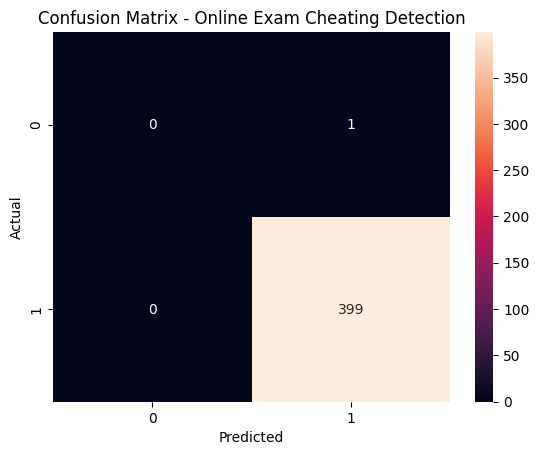

In [12]:
# Visualization
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Online Exam Cheating Detection")
plt.show()


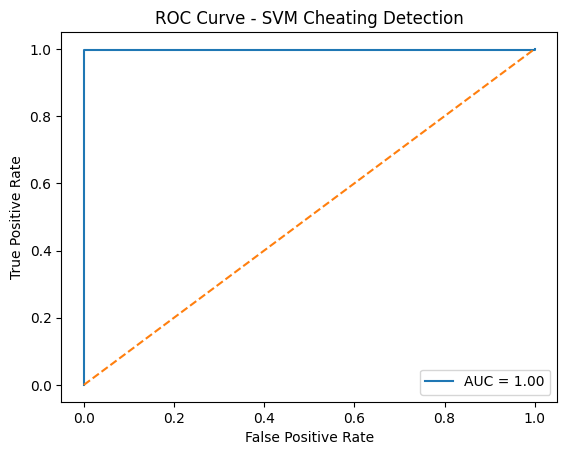

In [13]:
# ROC Curve (Performance Visualization)

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM Cheating Detection")
plt.legend()
plt.show()


In [14]:
# New Data Prediction
new_student = pd.DataFrame([{
    "tab_switch_count": 9,
    "webcam_disconnects": 2,
    "time_per_question": 30,
    "copy_paste_actions": 5,
    "face_not_detected_count": 3,
    "suspicious_keypress_count": 6
}])

new_student_scaled = scaler.transform(new_student)
prediction = svm_model.predict(new_student_scaled)[0]

if prediction == 1:
    print("Prediction: CHEATING DETECTED")
else:
    print("Prediction: NORMAL BEHAVIOR")


Prediction: CHEATING DETECTED
